In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.base import BaseEstimator
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score, accuracy_score
from scipy.linalg import pinv, inv # pseudo-inverse dan inverse

#Bangun Model

In [2]:

df = pd.read_csv('merged.csv')

In [3]:
df

,E.Colli,Coliform,Arsen,Kromium,Kadmium,Nitrit,Nitrat,Sianida,Selenium,Alumunium,...,Chlor,BOD5,COD,Bau,Warna,Kekeruhan,Rasa,Suhu,TDS,Potabilitas
0,0.0,0.0,0.008211,0.033758,0.002651,1.341045,26.183060,0.029120,0.004383,0.118025,...,0.347660,1.303905,1.943109,Tidak Berbau,13.0,4.369784,Tidak Berasa,26.61,40.0,1
1,0.0,0.0,0.006390,0.036294,0.001421,0.674963,47.406272,0.010811,0.005170,0.106107,...,0.685041,0.197455,4.802974,Tidak Berbau,1.0,3.760767,Tidak Berasa,26.61,179.0,1
2,0.0,0.0,0.000526,0.015886,0.001801,0.461791,20.388563,0.024968,0.007694,0.101517,...,0.552312,0.096539,1.005643,Tidak Berbau,9.0,0.251494,Tidak Berasa,26.61,227.0,1
3,0.0,0.0,0.001834,0.035139,0.001814,0.984060,33.154122,0.036068,0.002166,0.001679,...,0.533532,0.010193,1.443128,Tidak Berbau,12.0,3.745131,Tidak Berasa,26.61,81.0,1
4,0.0,0.0,0.000296,0.016542,0.001021,0.236862,28.173539,0.020301,0.006731,0.157492,...,0.285786,0.368136,2.681199,Tidak Berbau,10.0,0.708630,Tidak Berasa,26.61,213.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4193,0.0,0.0,0.008601,0.027459,0.000675,2.386314,25.123334,0.054425,0.003529,0.162344,...,0.255035,1.538530,3.697224,Tidak Berbau,10.0,1.486363,Tidak Berasa,27.56,189.0,1
4194,0.0,0.0,0.002955,0.046646,0.001765,1.844919,2.521960,0.010750,0.004319,0.162694,...,0.771050,1.885959,4.447617,Tidak Berbau,14.0,0.965607,Tidak Berasa,28.57,313.0,1
4195,0.0,0.0,0.006008,0.036391,0.000463,1.443007,26.258688,0.057199,0.009796,0.050312,...,0.948432,0.753458,1.969071,Tidak Berbau,7.0,1.946785,Tidak Berasa,28.57,333.0,1
4196,0.0,0.0,0.003092,0.032984,0.000072,0.739886,15.318995,0.040972,0.002950,0.181172,...,0.665120,0.960084,1.698853,Tidak Berbau,4.0,4.419420,Tidak Berasa,29.58,2.0,1


# Exploratory Data Analysis

In [4]:
df.shape

(4198, 29)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4198 entries, 0 to 4197
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   E.Colli      4188 non-null   float64
 1   Coliform     4135 non-null   float64
 2   Arsen        4198 non-null   float64
 3   Kromium      4198 non-null   float64
 4   Kadmium      4197 non-null   float64
 5   Nitrit       4194 non-null   float64
 6   Nitrat       4194 non-null   float64
 7   Sianida      4198 non-null   float64
 8   Selenium     4198 non-null   float64
 9   Alumunium    4198 non-null   float64
 10  Besi         4198 non-null   float64
 11  Kesadahan    4198 non-null   float64
 12  Klorida      4198 non-null   float64
 13  Mangan       4198 non-null   float64
 14  pH           4197 non-null   float64
 15  Seng         4198 non-null   float64
 16  Sulfat       4197 non-null   float64
 17  Tembaga      4197 non-null   float64
 18  Amonia       4191 non-null   float64
 19  Chlor 

In [6]:
df['Potabilitas']=df['Potabilitas'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4198 entries, 0 to 4197
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   E.Colli      4188 non-null   float64 
 1   Coliform     4135 non-null   float64 
 2   Arsen        4198 non-null   float64 
 3   Kromium      4198 non-null   float64 
 4   Kadmium      4197 non-null   float64 
 5   Nitrit       4194 non-null   float64 
 6   Nitrat       4194 non-null   float64 
 7   Sianida      4198 non-null   float64 
 8   Selenium     4198 non-null   float64 
 9   Alumunium    4198 non-null   float64 
 10  Besi         4198 non-null   float64 
 11  Kesadahan    4198 non-null   float64 
 12  Klorida      4198 non-null   float64 
 13  Mangan       4198 non-null   float64 
 14  pH           4197 non-null   float64 
 15  Seng         4198 non-null   float64 
 16  Sulfat       4197 non-null   float64 
 17  Tembaga      4197 non-null   float64 
 18  Amonia       4191 non-null  

In [7]:
label_encoder = LabelEncoder()
df['Bau']=label_encoder.fit_transform(df['Bau'])
df['Rasa ']=label_encoder.fit_transform(df['Rasa '])

C:\Users\ASUS\AppData\Local\Temp\ipykernel_9008\1305276299.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='Greens')


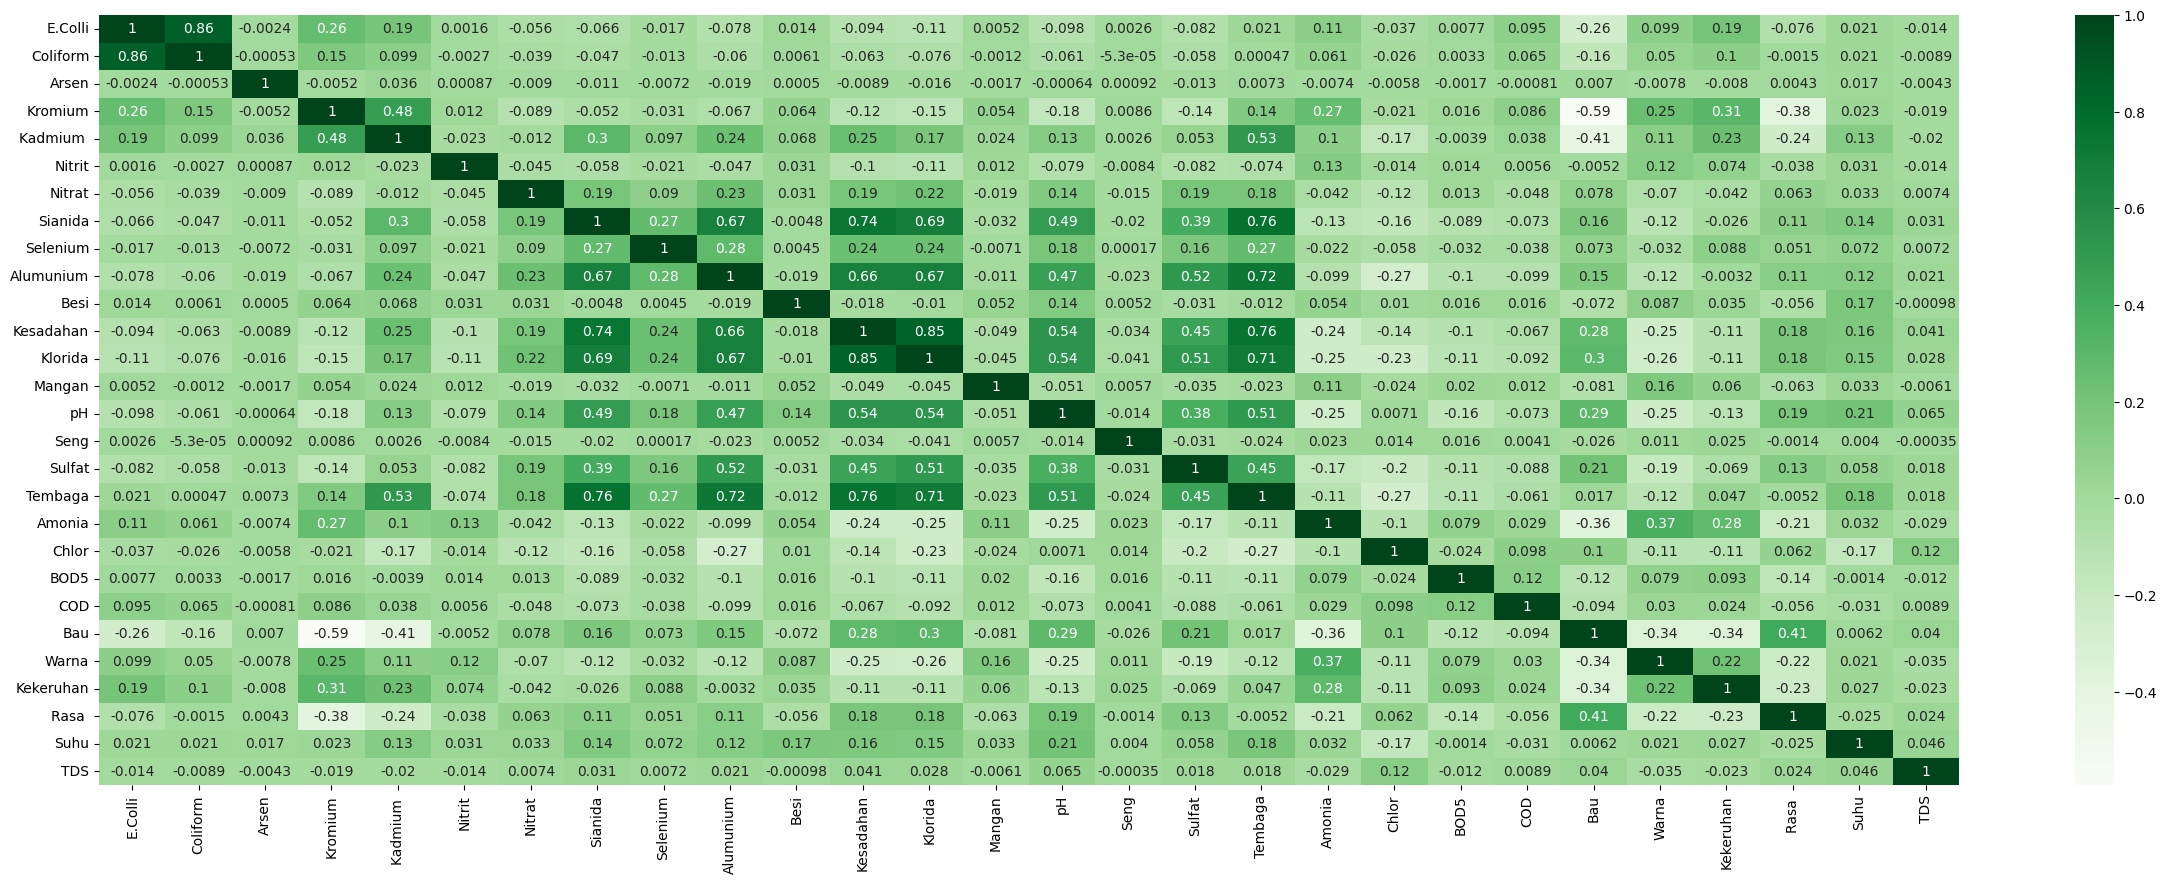

In [8]:
# Bivariate Analysis

plt.figure(figsize=(30,10))
sns.heatmap(df.corr(), annot=True, cmap='Greens')
plt.show()

# Hasil Analysis
# Setiap feature pada data tidak memiliki korelasi yang kuat.

In [9]:
df = df.drop(['BOD5', 'COD', 'Suhu'], axis=1)

In [10]:
df.describe()

,E.Colli,Coliform,Arsen,Kromium,Kadmium,Nitrit,Nitrat,Sianida,Selenium,Alumunium,...,Seng,Sulfat,Tembaga,Amonia,Chlor,Bau,Warna,Kekeruhan,Rasa,TDS
count,4.188000e+03,4.135000e+03,4.198000e+03,4198.000000,4197.000000,4194.000000,4194.000000,4198.000000,4198.000000,4198.000000,...,4198.000000,4197.000000,4197.000000,4191.000000,4197.000000,4198.000000,4198.000000,4198.000000,4198.000000,4195.000000
mean,1.258218e+09,9.371156e+08,1.453101e+05,0.675595,0.245696,5.014365,16.736226,0.140708,0.006338,0.084371,...,3.576455,72.924280,1.419544,4.116762,35.997135,0.892330,21.386334,3.967924,0.956408,252.880017
std,9.998972e+09,1.064919e+10,7.194022e+06,1.610280,0.428099,22.791899,37.762643,0.260278,0.015998,0.084312,...,31.235537,68.510342,1.602752,10.515487,115.212705,0.310001,40.469201,8.480950,0.204210,761.391743
min,-2.146550e+08,-2.400000e+01,0.000000e+00,0.000000,0.000000,-35.000000,-17.000000,0.000000,0.000000,0.000000,...,-27.000000,-36.000000,0.000000,-17.000000,-18.000000,0.000000,-9.000000,-8.000000,0.000000,-10.000000
25%,1.000000e+00,1.000000e+00,2.320000e-04,0.010775,0.001146,0.319125,1.372500,0.001000,0.000650,0.006000,...,0.050000,28.440000,0.018000,0.140000,0.080000,1.000000,5.800000,0.600000,1.000000,125.900000
50%,6.000000e+00,9.250933e+00,9.630000e-04,0.060000,0.002992,1.836323,9.228935,0.009004,0.002557,0.059621,...,1.749221,32.200000,0.617921,0.480319,0.679210,1.000000,9.000000,1.467407,1.000000,188.000000
75%,1.052500e+02,3.450000e+05,1.229700e-01,0.543810,0.440221,3.917582,25.287583,0.069810,0.010330,0.144430,...,3.660452,113.059990,2.000000,1.477947,1.865666,1.000000,18.000000,4.015168,1.000000,291.000000
max,2.300000e+11,4.800000e+11,4.300000e+08,25.000000,6.000000,741.000000,973.000000,0.997800,0.670000,0.299794,...,761.000000,500.000000,4.998639,166.000000,422.000000,1.000000,928.000000,130.000000,1.000000,23224.000000


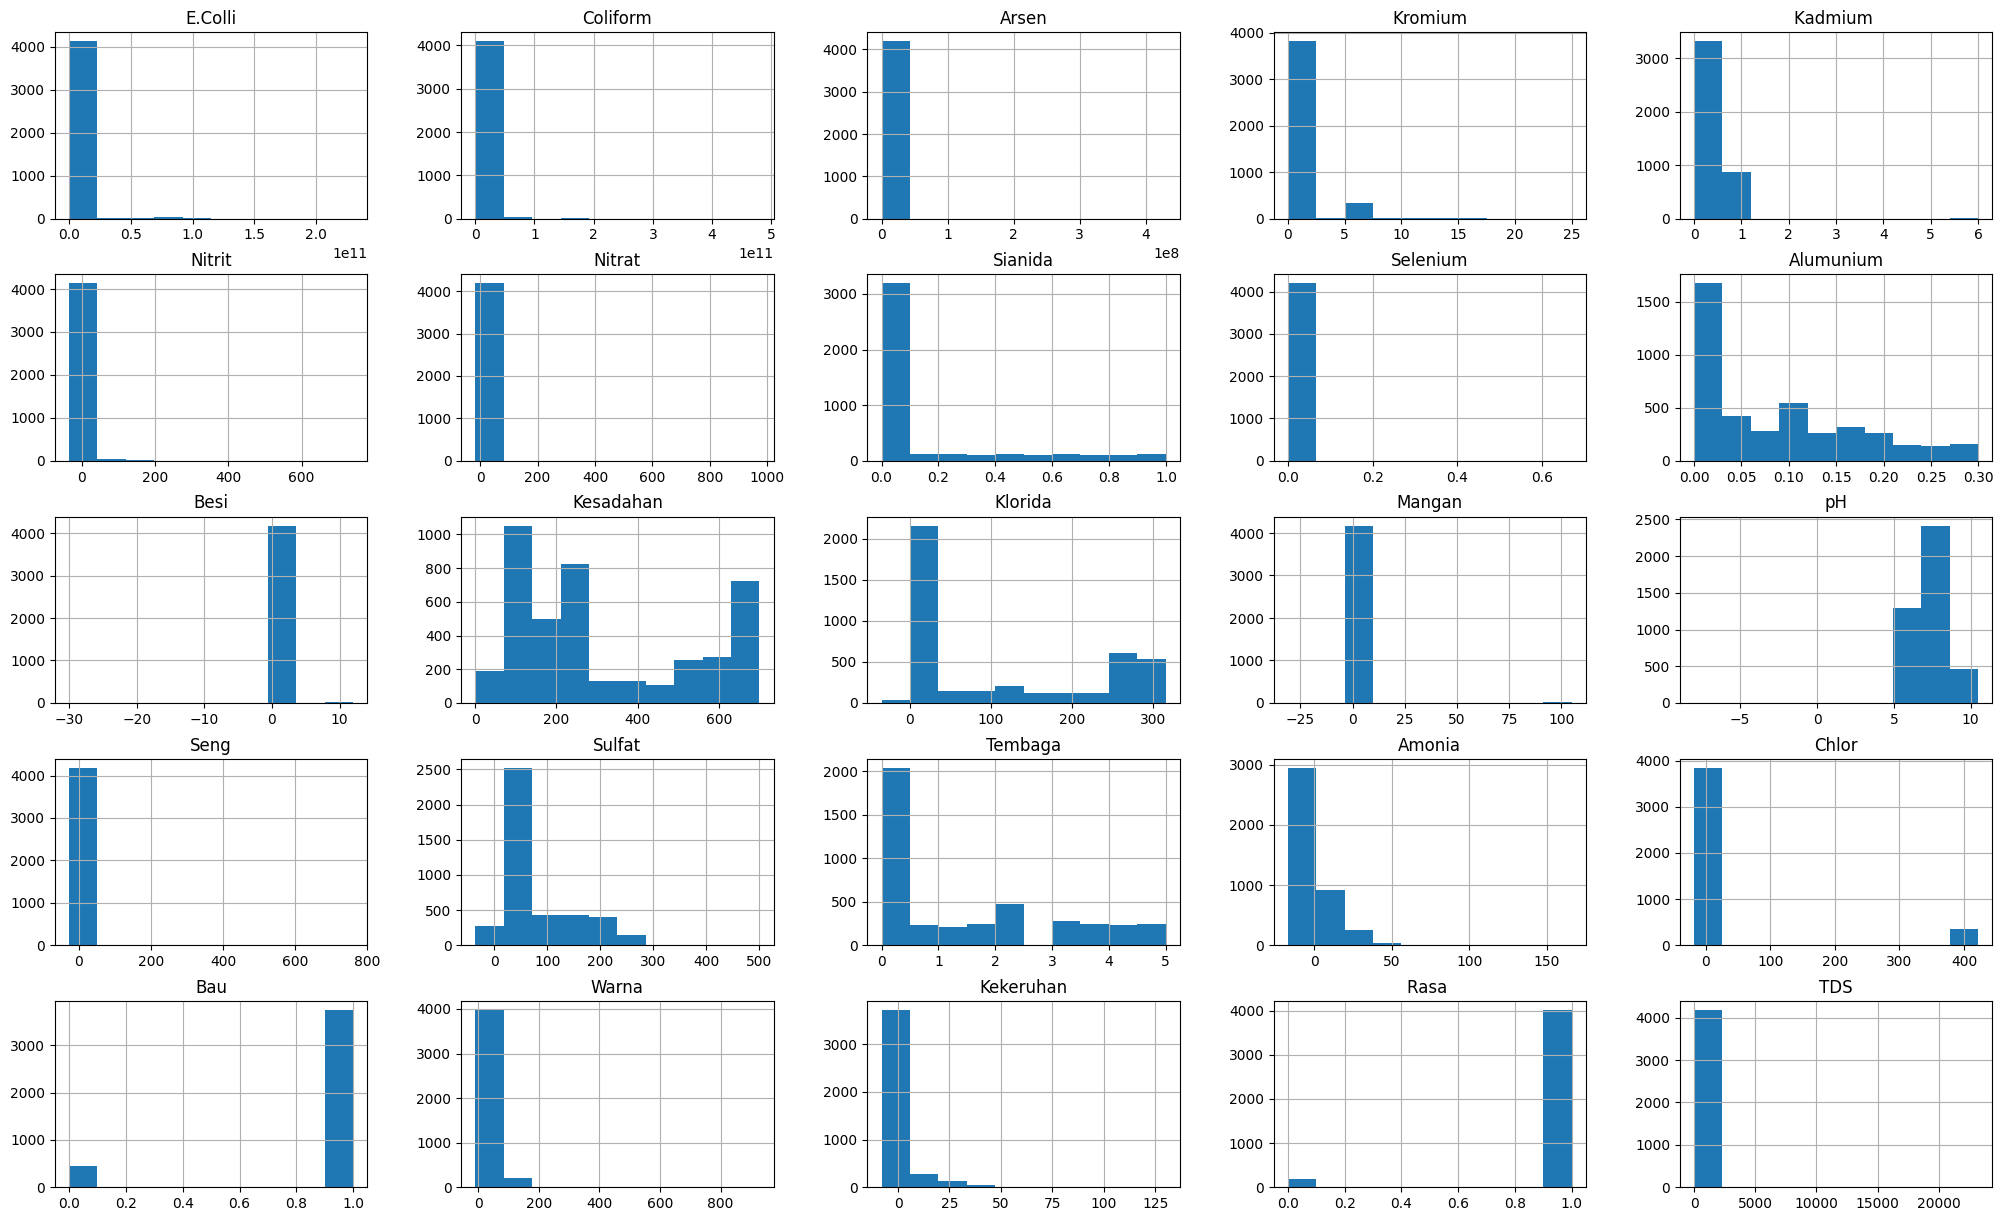

In [11]:
# Univariate Analysis
df.drop('Potabilitas', axis=1).hist(figsize=(25,15));

# Hasil analisis:
# 1. feature pada data memiliki distribusi yang normal.
# 2. feature 'solids' agak sedikit condong ke arah kiri.

In [12]:
# Count target feature
df['Potabilitas'].value_counts()

0    3237
1     961
Name: Potabilitas, dtype: int64

In [13]:
# Missing Values

df.isna().sum()

# ada 3 feature yang hilang datanya yaitu, ph, sulfate dan trihalomethanes.

E.Colli        10
Coliform       63
Arsen           0
Kromium         0
Kadmium         1
Nitrit          4
Nitrat          4
Sianida         0
Selenium        0
Alumunium       0
Besi            0
Kesadahan       0
Klorida         0
Mangan          0
pH              1
Seng            0
Sulfat          1
Tembaga         1
Amonia          7
Chlor           1
Bau             0
Warna           0
Kekeruhan       0
Rasa            0
TDS             3
Potabilitas     0
dtype: int64

In [14]:
# Percentaged Missing Values

df.isna().mean()*100

# persentase tiap feature yang kehilangan datanya adalah 14%(ph), 23%(sulfate) dan 4%(trihalomethanes).

E.Colli        0.238209
Coliform       1.500715
Arsen          0.000000
Kromium        0.000000
Kadmium        0.023821
Nitrit         0.095283
Nitrat         0.095283
Sianida        0.000000
Selenium       0.000000
Alumunium      0.000000
Besi           0.000000
Kesadahan      0.000000
Klorida        0.000000
Mangan         0.000000
pH             0.023821
Seng           0.000000
Sulfat         0.023821
Tembaga        0.023821
Amonia         0.166746
Chlor          0.023821
Bau            0.000000
Warna          0.000000
Kekeruhan      0.000000
Rasa           0.000000
TDS            0.071463
Potabilitas    0.000000
dtype: float64

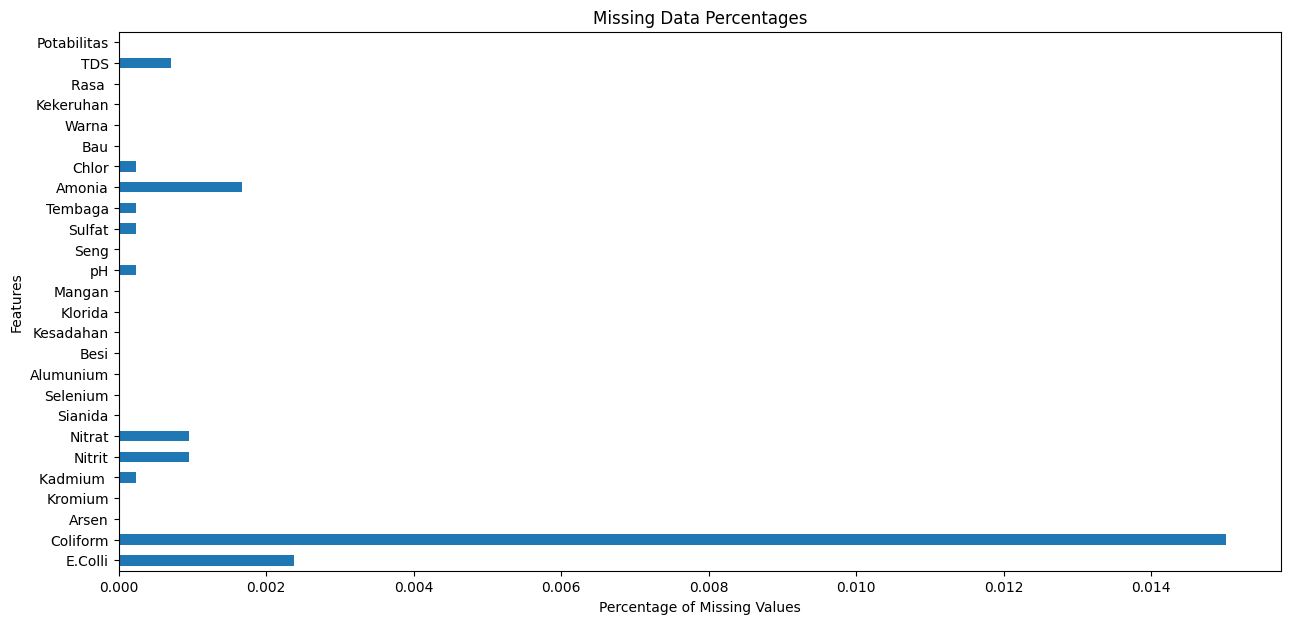

In [15]:
# Visualize Percentage Missing Values

df.isna().mean().plot.barh(figsize=(15,7))
plt.ylabel('Features')
plt.xlabel('Percentage of Missing Values')
plt.title('Missing Data Percentages')
plt.show()

# visualisasi persentase dari setiap feature yang kehilangan data.

# Handle Missing Values

### Menggunakan Median

In [16]:
median = df.median()
df = df.fillna(median)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_9008\205953159.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  median = df.median()


In [17]:
df.isnull().sum()

E.Colli        0
Coliform       0
Arsen          0
Kromium        0
Kadmium        0
Nitrit         0
Nitrat         0
Sianida        0
Selenium       0
Alumunium      0
Besi           0
Kesadahan      0
Klorida        0
Mangan         0
pH             0
Seng           0
Sulfat         0
Tembaga        0
Amonia         0
Chlor          0
Bau            0
Warna          0
Kekeruhan      0
Rasa           0
TDS            0
Potabilitas    0
dtype: int64

Partitioning and Scaling data

In [18]:
X = df.drop('Potabilitas', axis=1)
y = df['Potabilitas']

smote = SMOTE()
X1, y1 = smote.fit_resample(X, y)
df_resampled = pd.concat([pd.DataFrame(X1, columns=X.columns), pd.Series(y1, name = 'Potabilitas')], axis =1)

In [19]:
print(df_resampled['Potabilitas'].value_counts())

0    3237
1    3237
Name: Potabilitas, dtype: int64


In [20]:
X = df_resampled.drop('Potabilitas', axis=1)
y = df_resampled['Potabilitas']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)

# Extrema Learning Machine

-----------------------------------------------------
classifier train accuracy: 0.8059470940335972
classifier test accuracy: 0.81003861003861

classifier test prediction: [0 1 0 ... 1 1 0]
classifier running time: 0.02799270000832621
Akurasi model dengan membuang 15% data: 81.0 %


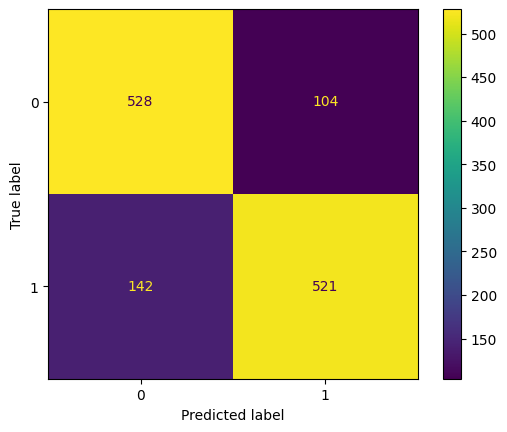

In [21]:
import numpy as np
from numpy.linalg import pinv, inv
import time
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

class elm():
    def __init__(self, hidden_units, activation_function, x, y, C, elm_type, one_hot=True, random_type='normal'):
        self.hidden_units = hidden_units
        self.activation_function = activation_function
        self.random_type = random_type
        self.x = x
        self.y = y
        self.C = C
        self.class_num = np.unique(self.y).shape[0]
        self.beta = np.zeros((self.hidden_units, self.class_num))
        self.elm_type = elm_type
        self.one_hot = one_hot

        if elm_type == 'clf' and self.one_hot:
            self.one_hot_label = np.zeros((self.y.shape[0], self.class_num))
            for i in range(self.y.shape[0]):
                self.one_hot_label[i, int(self.y[i])] = 1

        if self.random_type == 'uniform':
            self.W = np.random.uniform(low=0, high=1, size=(self.hidden_units, self.x.shape[1]))
            self.b = np.random.uniform(low=0, high=1, size=(self.hidden_units, 1))
        if self.random_type == 'normal':
            self.W = np.random.normal(loc=0, scale=0.5, size=(self.hidden_units, self.x.shape[1]))
            self.b = np.random.normal(loc=0, scale=0.5, size=(self.hidden_units, 1))

    def __input2hidden(self, x):
        x = np.array(x, dtype=np.float64)  # Mengubah tipe data x menjadi float64
        self.temH = np.dot(self.W, x.T) + self.b

        if self.activation_function == 'sigmoid':
            self.H = 1 / (1 + np.exp(-self.temH))

        if self.activation_function == 'relu':
            self.H = self.temH * (self.temH > 0)

        if self.activation_function == 'sin':
            self.H = np.sin(self.temH)

        if self.activation_function == 'tanh':
            self.H = (np.exp(self.temH) - np.exp(-self.temH)) / (np.exp(self.temH) + np.exp(-self.temH))

        if self.activation_function == 'leaky_relu':
            self.H = np.maximum(0, self.temH) + 0.1 * np.minimum(0, self.temH)

        return self.H

    def __hidden2output(self, H):
        self.output = np.dot(H.T, self.beta)
        return self.output

    def fit(self, algorithm):
        self.time1 = time.perf_counter()
        self.H = self.__input2hidden(self.x)
        if self.elm_type == 'clf':
            if self.one_hot:
                self.y_temp = self.one_hot_label
            else:
                self.y_temp = self.y
        if self.elm_type == 'reg':
            self.y_temp = self.y

        if algorithm == 'no_re':
            self.beta = np.dot(pinv(self.H.T), self.y_temp)

        if algorithm == 'solution1':
            self.tmp1 = inv(np.eye(self.H.shape[0]) / self.C + np.dot(self.H, self.H.T))
            self.tmp2 = np.dot(self.tmp1, self.H)
            self.beta = np.dot(self.tmp2, self.y_temp)

        if algorithm == 'solution2':
            self.tmp1 = inv(np.eye(self.H.shape[0]) / self.C + np.dot(self.H, self.H.T))
            self.tmp2 = np.dot(self.H.T, self.tmp1)
            self.beta = np.dot(self.tmp2.T, self.y_temp)
        self.time2 = time.perf_counter()

        self.result = self.__hidden2output(self.H)

        if self.elm_type == 'clf':
            self.result = np.exp(self.result) / np.sum(np.exp(self.result), axis=1).reshape(-1, 1)

        if self.elm_type == 'clf':
            self.y_ = np.where(self.result == np.max(self.result, axis=1).reshape(-1, 1))[1]
            self.correct = 0
            for i in range(self.y.shape[0]):
                if self.y_[i] == self.y[i]:
                    self.correct += 1
            self.train_score = self.correct / self.y.shape[0]
        if self.elm_type == 'reg':
            self.train_score = np.sqrt(np.sum((self.result - self.y) * (self.result - self.y)) / self.y.shape[0])
        train_time = str(self.time2 - self.time1)
        return self.beta, self.train_score, train_time

    def predict(self, x):
        x = np.array(x, dtype=np.float64)  # Mengubah tipe data x menjadi float64
        self.H = self.__input2hidden(x)
        self.y_ = self.__hidden2output(self.H)
        if self.elm_type == 'clf':
            self.y_ = np.where(self.y_ == np.max(self.y_, axis=1).reshape(-1, 1))[1]

        return self.y_

    def predict_proba(self, x):
        x = np.array(x, dtype=np.float64)  # Mengubah tipe data x menjadi float64
        self.H = self.__input2hidden(x)
        self.y_ = self.__hidden2output(self.H)
        if self.elm_type == 'clf':
            self.proba = np.exp(self.y_) / np.sum(np.exp(self.y_), axis=1).reshape(-1, 1)
        return self.proba

    def score(self, x, y):
        self.prediction = self.predict(x)
        if self.elm_type == 'clf':
            self.correct = 0
            for i in range(y.shape[0]):
                if self.prediction[i] == y[i]:
                    self.correct += 1
            self.test_score = self.correct / y.shape[0]
        if self.elm_type == 'reg':
            self.test_score = np.sqrt(np.sum((self.result - self.y) * (self.result - self.y)) / self.y.shape[0])
        return self.test_score

model = elm(hidden_units=50, activation_function='relu', C=0.01, elm_type='clf', random_type='normal',
            x=X_train, y=y_train.astype(int).values.reshape(-1, 1))# Mengubah dimensi y_train menjadi (n_samples, 1)
beta, train_accuracy, running_time = model.fit('solution2')
print('-----------------------------------------------------')
print("classifier train accuracy:", train_accuracy)
prediction = model.predict(X_test)
print('classifier test accuracy:', model.score(X_test, y_test.values.reshape(-1, 1)))  # Mengubah dimensi y_test menjadi (n_samples, 1)
print("\nclassifier test prediction:", prediction)
print('classifier running time:', running_time)
print('Akurasi model dengan membuang 15% data:', np.round(np.mean(prediction == y_test) * 100, 2), '%')

cm = confusion_matrix(y_test, prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


In [22]:
import pickle
filename = 'ELM-FRISKA_FIX.sav'
pickle.dump(model, open(filename,'wb'))

###Modelling Relu


In [23]:
from sklearn.preprocessing import StandardScaler
#input_data = 
#(0, 0, 0.01, 0.01, 0.001, 3, 2, 0.01, 0.003, 0.002, 0.01, 0.01, 0.01, 0.001, 7, 1, 1, 0.1, 1, 0.1, 1, 7, 1, 1, 1)
input_data = (0, 0,	0.005655451158,	0.04422282104, 0.001929926869, 1.033424077, 49.25347042, 0.01636824787,	0.0010235004, 0.1585044317,	0.1763237466, 133.1428071, 100.8564594,	0.2105645123, 6.675382922, 1.914690199,	217.6817346, 1.300347124, 0.6097329691,	0.9097505099, 1, 7,	3.220473527, 1,	439)
input_data_as_numpy_array = np.array(input_data)
input_data_reshape = input_data_as_numpy_array.reshape(1, -1)


prediction = model.predict(input_data_reshape)
print(prediction)

if(prediction[0] == 0) :
    print('Air Tidak Layak')

else :
    print('Air Layak')

[1]
Air Layak


AUC: 0.8878252859079366


C:\Users\ASUS\AppData\Local\Temp\ipykernel_9008\204188836.py:113: RuntimeWarning: overflow encountered in exp
  self.proba = np.exp(self.y_) / np.sum(np.exp(self.y_), axis=1).reshape(-1, 1)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_9008\204188836.py:113: RuntimeWarning: invalid value encountered in divide
  self.proba = np.exp(self.y_) / np.sum(np.exp(self.y_), axis=1).reshape(-1, 1)


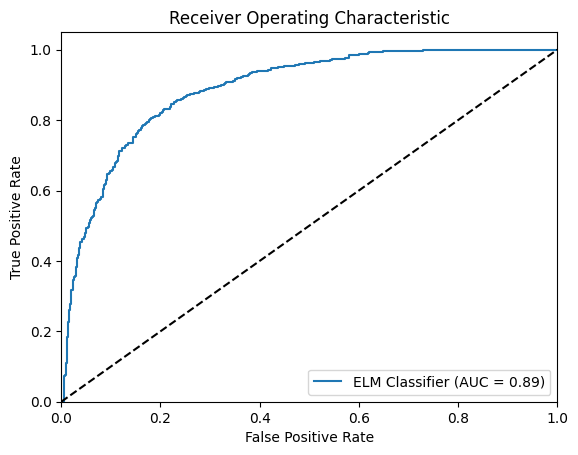

In [24]:
proba = model.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test.values, proba[:, 1])
auc_score = auc(fpr, tpr)
print('AUC:', auc_score)
plt.figure()
plt.plot(fpr, tpr, label='ELM Classifier (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

#Testing Model

In [25]:


# Membaca file CSV
df1 = pd.read_csv('Test2.csv')

In [26]:
# Mengubah tipe data kolom 'Potabilitas' menjadi kategori
df1['Potabilitas'] = df1['Potabilitas'].astype('category')

# Menampilkan informasi dataframe
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   E.Colli      1599 non-null   float64 
 1   Coliform     1599 non-null   float64 
 2   Arsen        1599 non-null   float64 
 3   Kromium      1599 non-null   float64 
 4   Kadmium      1599 non-null   float64 
 5   Nitrit       1599 non-null   float64 
 6   Nitrat       1599 non-null   float64 
 7   Sianida      1599 non-null   float64 
 8   Selenium     1599 non-null   float64 
 9   Alumunium    1599 non-null   float64 
 10  Besi         1599 non-null   float64 
 11  Kesadahan    1599 non-null   float64 
 12  Klorida      1599 non-null   float64 
 13  Mangan       1599 non-null   float64 
 14  pH           1599 non-null   float64 
 15  Seng         1599 non-null   float64 
 16  Sulfat       1599 non-null   float64 
 17  Tembaga      1599 non-null   float64 
 18  Amonia       1599 non-null  

In [27]:
df1

,E.Colli,Coliform,Arsen,Kromium,Kadmium,Nitrit,Nitrat,Sianida,Selenium,Alumunium,...,Chlor,BOD5,COD,Bau,Warna,Kekeruhan,Rasa,Suhu,TDS,Potabilitas
0,0.000000,0.000000,0.008211,0.033758,0.002651,1.341045,26.183060,0.029120,0.004383,0.118025,...,0.347660,1.303905,1.943109,Tidak Berbau,13.0,4.369784,Tidak Berasa,26.61,40.0,1
1,0.000000,0.000000,0.006390,0.036294,0.001421,0.674963,47.406272,0.010811,0.005170,0.106107,...,0.685041,0.197455,4.802974,Tidak Berbau,1.0,3.760767,Tidak Berasa,26.61,179.0,1
2,0.000000,0.000000,0.000526,0.015886,0.001801,0.461791,20.388563,0.024968,0.007694,0.101517,...,0.552312,0.096539,1.005643,Tidak Berbau,9.0,0.251494,Tidak Berasa,26.61,227.0,1
3,0.000000,0.000000,0.001834,0.035139,0.001814,0.984060,33.154122,0.036068,0.002166,0.001679,...,0.533532,0.010193,1.443128,Tidak Berbau,12.0,3.745131,Tidak Berasa,26.61,81.0,1
4,0.000000,0.000000,0.000296,0.016542,0.001021,0.236862,28.173539,0.020301,0.006731,0.157492,...,0.285786,0.368136,2.681199,Tidak Berbau,10.0,0.708630,Tidak Berasa,26.61,213.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,2.706266,5.284462,0.530028,0.424935,0.882570,2.687532,48.861277,0.687655,0.011052,0.184128,...,1.234640,0.699557,3.201704,Tidak Berbau,6.0,2.324902,Tidak Berasa,30.20,65.0,0
1595,9.512193,3.156940,0.223332,0.203027,0.864192,3.099084,51.912094,0.990045,0.019505,0.286865,...,1.886387,0.318223,5.201377,Tidak Berbau,3.0,4.043096,Tidak Berasa,30.20,490.0,0
1596,3.791499,5.786134,0.936582,0.907984,0.638284,1.173561,27.156349,0.953029,0.012536,0.133328,...,0.638256,0.284006,2.401663,Tidak Berbau,0.0,1.328373,Tidak Berasa,30.20,361.0,0
1597,5.114382,9.268903,0.624047,0.769398,0.795079,2.815095,7.136866,0.775241,0.014513,0.197124,...,1.909399,1.348250,7.445766,Tidak Berbau,9.0,1.200120,Tidak Berasa,30.20,14.0,0


In [28]:
df1.isnull().sum()

E.Colli        0
Coliform       0
Arsen          0
Kromium        0
Kadmium        0
Nitrit         0
Nitrat         0
Sianida        0
Selenium       0
Alumunium      0
Besi           0
Kesadahan      0
Klorida        0
Mangan         0
pH             0
Seng           0
Sulfat         0
Tembaga        0
Amonia         0
Chlor          0
BOD5           0
COD            0
Bau            0
Warna          0
Kekeruhan      0
Rasa           0
Suhu           0
TDS            0
Potabilitas    0
dtype: int64

In [29]:
# Membuat objek LabelEncoder
label_encoder = LabelEncoder()

# Menggunakan LabelEncoder untuk mengubah nilai dalam kolom 'Bau' dan 'Rasa'
df1['Bau'] = label_encoder.fit_transform(df1['Bau'])
df1['Rasa '] = label_encoder.fit_transform(df1['Rasa '])

In [30]:
# Menghapus kolom 'COD', 'BOD5', dan 'Suhu'
df1.drop(columns=["COD", "BOD5", "Suhu"], inplace=True)

In [31]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   E.Colli      1599 non-null   float64 
 1   Coliform     1599 non-null   float64 
 2   Arsen        1599 non-null   float64 
 3   Kromium      1599 non-null   float64 
 4   Kadmium      1599 non-null   float64 
 5   Nitrit       1599 non-null   float64 
 6   Nitrat       1599 non-null   float64 
 7   Sianida      1599 non-null   float64 
 8   Selenium     1599 non-null   float64 
 9   Alumunium    1599 non-null   float64 
 10  Besi         1599 non-null   float64 
 11  Kesadahan    1599 non-null   float64 
 12  Klorida      1599 non-null   float64 
 13  Mangan       1599 non-null   float64 
 14  pH           1599 non-null   float64 
 15  Seng         1599 non-null   float64 
 16  Sulfat       1599 non-null   float64 
 17  Tembaga      1599 non-null   float64 
 18  Amonia       1599 non-null  

In [32]:
X1 = df1.drop(['Potabilitas'], axis=1)
y1 = df1['Potabilitas']

#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X1)

Prediksi: [1 1 1 ... 1 1 0]
Akurasi: 0.683552220137586


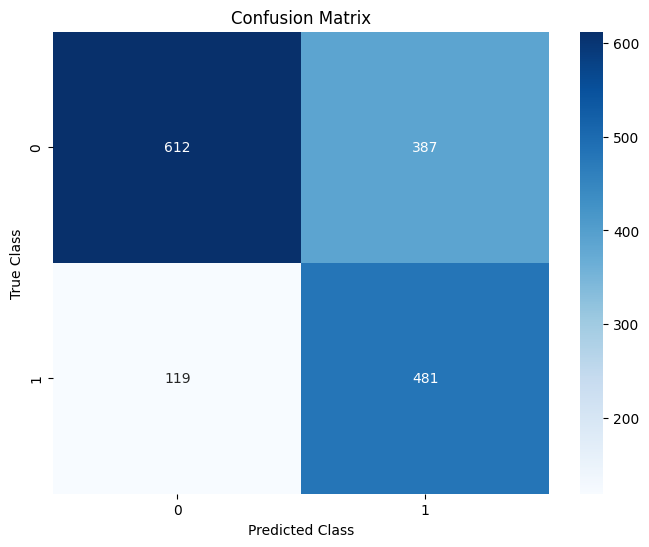

              precision    recall  f1-score   support

           0       0.84      0.61      0.71       999
           1       0.55      0.80      0.66       600

    accuracy                           0.68      1599
   macro avg       0.70      0.71      0.68      1599
weighted avg       0.73      0.68      0.69      1599



In [33]:
# Memprediksi data baru menggunakan model
y_pred_new = model.predict(X1)

# Menampilkan hasil prediksi
print("Prediksi:", y_pred_new)

# Menghitung akurasi
accuracy_new = accuracy_score(y1, y_pred_new)
print("Akurasi:", accuracy_new)

# Compute confusion matrix
confusion_mat = confusion_matrix(y1, y_pred_new)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

# Generate classification report
report = classification_report(y1, y_pred_new)
print(report)